In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


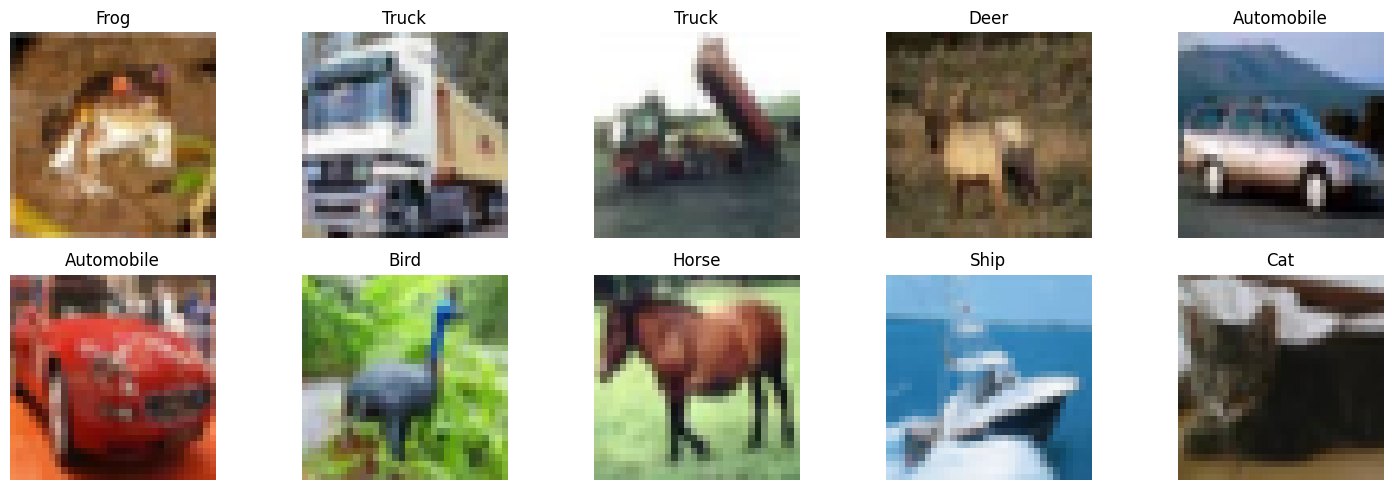

In [ ]:
import matplotlib.pyplot as plt
from keras.datasets import cifar10

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Define the class labels for CIFAR-10
class_labels = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]

# Plot sample images with labels
def plot_sample_images(x, y, class_labels, num_samples=10):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x[i])
        plt.title(class_labels[y[i][0]])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Show the first 10 images from the training set
plot_sample_images(x_train, y_train, class_labels)


Example training images and their labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile', 'automobile', 'bird', 'horse', 'ship', 'cat']


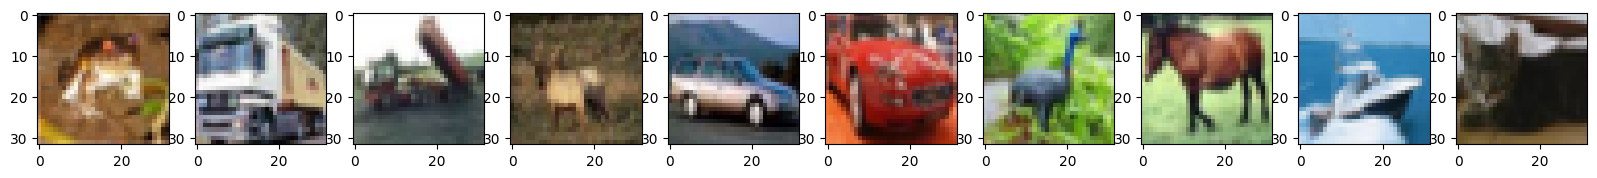

In [ ]:
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:10]]))
print('Corresponding classes for the labels: ' + str([cifar10_classes[x[0]] for x in y_train[0:10]]))

fig, axarr = plt.subplots(1, 10)
fig.set_size_inches(20, 6)

for i in range(10):
    image = x_train[i]
    axarr[i].imshow(image)
plt.show()

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [ ]:
from keras.layers import Dense
from keras.layers import Flatten

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.datasets import cifar10
from keras.utils import to_categorical

# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Define the CNN model
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Layer
model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model.add(Flatten())

# Fully Connected Layers
model.add(Dense(128, activation='relu'))  # First dense layer
model.add(Dropout(0.3))                   # Dropout to reduce overfitting
model.add(Dense(64, activation='relu'))   # Second dense layer

# Output layer with softmax activation for multi-class classification
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model architecture
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 364,426 (1.39 MB)

 Trainable params: 364,426 (1.39 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.3129 - loss: 1.8289 - val_accuracy: 0.5598 - val_loss: 1.2344
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5636 - loss: 1.2076 - val_accuracy: 0.6316 - val_loss: 1.0698
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6480 - loss: 1.0028 - val_accuracy: 0.6890 - val_loss: 0.8920
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6942 - loss: 0.8696 - val_accuracy: 0.7065 - val_loss: 0.8596
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7187 - loss: 0.8083 - val_accuracy: 0.7171 - val_loss: 0.8302
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7409 - loss: 0.7357 - val_accuracy: 0.7232 - val_loss: 0.8118
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7650 - loss: 0.6796 - val_accuracy: 0.7307 - val_loss: 0.7927
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7770 - loss: 0.6306 

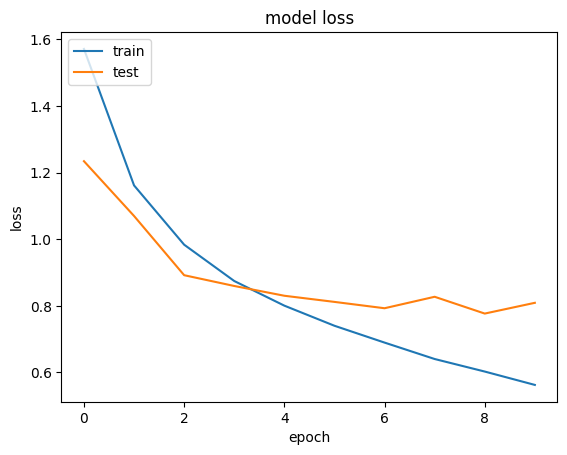

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.3770 - loss: 1.7096 - val_accuracy: 0.5653 - val_loss: 1.2374
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5836 - loss: 1.1906 - val_accuracy: 0.6163 - val_loss: 1.0873
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6414 - loss: 1.0318 - val_accuracy: 0.6493 - val_loss: 1.0086
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6815 - loss: 0.9147 - val_accuracy: 0.6761 - val_loss: 0.9388
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7047 - loss: 0.8376 - val_accuracy: 0.6847 - val_loss: 0.9161
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7328 - loss: 0.7690 - val_accuracy: 0.6798 - val_loss: 0.9381
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7511 - loss: 0.7213 - val_accuracy: 0.6868 - val_loss: 0.9288
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7682 - loss: 0.6704 - val_accuracy: 0

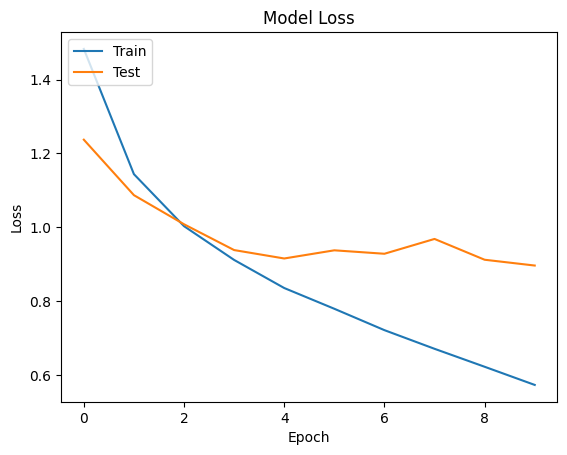

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.datasets import cifar10
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Define the CNN model
model = Sequential()

# Add convolutional and max pooling layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model.add(Flatten())

# Add fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Visualize training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


CNN model


accuracy 81 %

In [ ]:
# history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',    # Metric to monitor (e.g., validation loss)
    patience=3,            # Number of epochs with no improvement before stopping
    restore_best_weights=True # Restore model weights from the epoch with the best value of the monitored quantity
)

# Train the model with early stopping
history = model.fit(
    x_train,
    y_train,
    epochs=100,
    batch_size=64,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]
)


Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8399 - loss: 0.4545 - val_accuracy: 0.7427 - val_loss: 0.8126
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8514 - loss: 0.4142 - val_accuracy: 0.7416 - val_loss: 0.8400
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8603 - loss: 0.3919 - val_accuracy: 0.7472 - val_loss: 0.8463
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8667 - loss: 0.3728 - val_accuracy: 0.7310 - val_loss: 0.9002


accuracy 86%

In [ ]:
score=model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7484 - loss: 0.7891


In [ ]:
from keras.models import load_model
model.save('cifar10_model.h5')

In [ ]:
from google.colab import files
files.download('cifar10_model.h5')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>